In [25]:
# Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import itertools

É interessante notar que, embora possa parecer surpreendente inicialmente, é bastante comum obter sequências de “caras” ou “coroas” ao lançar uma moeda várias vezes. Isso ocorre porque cada lançamento da moeda é um evento independente, o que significa que o resultado de um lançamento não afeta o resultado dos outros.


In [26]:
# Definir a semente para replicabilidade
np.random.seed(42)

# Número de amostras
num_amostras = 20

# Número de lançamentos de moeda por amostra
num_lancamentos = 10

# Valores possíveis (0 para "coroa", 1 para "cara")
valores = [0, 1]

# Probabilidades para cada valor
probs = [0.5, 0.5]

# Gerar as amostras
amostras = np.random.choice(valores, size=(num_amostras, num_lancamentos), p=probs)

print(amostras)

[[0 1 1 1 0 0 0 1 1 1]
 [0 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 1 1 0]
 [1 0 0 1 1 1 0 0 1 0]
 [0 0 0 1 0 1 0 1 1 0]
 [1 1 1 1 1 1 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 1]
 [1 0 0 1 1 1 1 0 0 0]
 [1 1 0 0 0 0 1 1 1 0]
 [0 1 1 1 1 0 1 0 0 0]
 [0 1 0 1 1 0 0 1 0 0]
 [0 0 1 1 1 1 1 0 1 1]
 [1 1 0 0 0 0 1 1 0 1]
 [0 0 0 0 1 0 1 1 0 1]
 [1 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 1 0 1 1 0 1]
 [0 1 1 1 0 1 0 0 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 0 1 1 0 1 1 1 1 0]
 [0 1 1 1 0 0 1 1 1 1]]


In [30]:
resultado_ber = scipy.stats.bernoulli.rvs(p=0.5, size=10)
#resultado_ber[:20]

In [31]:
pd.Series(resultado_ber).value_counts(normalize=True)

1    0.7
0    0.3
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


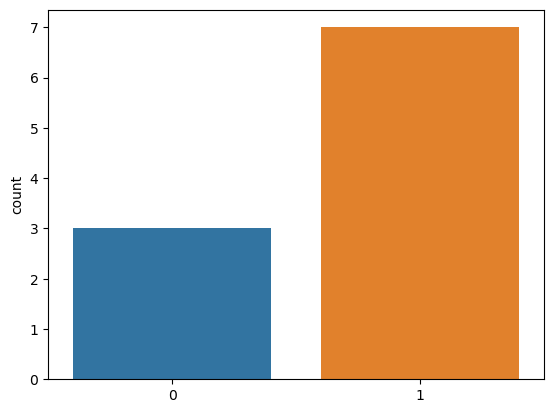

In [32]:
sns.countplot(resultado_ber);

In [17]:
def maior_sequencia_itertools(resultado_ber):
    max_cara = max_cora = 0

    for valor, grupo in itertools.groupby(resultado_ber):
        sequencia = len(list(grupo))
        if valor == 1:
            max_cara = max(max_cara, sequencia)
        else:
            max_cora = max(max_cora, sequencia)

    return max_cara, max_cora

max_cara, max_cora = maior_sequencia_itertools(resultado_ber)
print(f"Maior sequência de cara: {max_cara}")
print(f"Maior sequência de coroa: {max_cora}")

Maior sequência de cara: 21
Maior sequência de coroa: 17


Se você lançar uma moeda justa 10 vezes, há uma chance de cerca de 0,001 ou 0,1% de obter “cara” em todos os dez lançamentos. No entanto, se você repetir esse experimento muitas vezes (como fizemos ao simular 20.000 pessoas lançando a moeda 10 vezes), é provável que você veja essa sequência “improvável” ocorrer em algumas das repetições.

Isso é um lembrete de que, na probabilidade e estatística, eventos que podem parecer improváveis em um único experimento podem se tornar bastante comuns quando o experimento é repetido muitas vezes. É por isso que é tão importante entender os conceitos de probabilidade ao interpretar os resultados de um experimento ou estudo.

In [21]:
np.random.seed(42)  # Definindo a semente
resultado_ber = scipy.stats.bernoulli.rvs(p=0.5, size=1000000)

def maior_sequencia_itertools(resultado_ber):
    max_cara = max_cora = 0

    for valor, grupo in itertools.groupby(resultado_ber):
        sequencia = len(list(grupo))
        if valor == 1:
            max_cara = max(max_cara, sequencia)
        else:
            max_cora = max(max_cora, sequencia)

    return max_cara, max_cora

max_cara, max_cora = maior_sequencia_itertools(resultado_ber)
print(f"Maior sequência de cara: {max_cara}")
print(f"Maior sequência de coroa: {max_cora}")

Maior sequência de cara: 22
Maior sequência de coroa: 18


In [34]:
from scipy.stats import binom
# Definir a semente para replicabilidade
np.random.seed(42)

# Número de pessoas no estádio
num_pessoas = 20000

# Número de lançamentos de moeda por pessoa
num_lancamentos = 10

# Probabilidade de obter "cara" em um lançamento de moeda
p_cara = 0.5

# Simular os lançamentos de moeda para cada pessoa
resultados = np.random.binomial(num_lancamentos, p_cara, num_pessoas)

# Contar o número de pessoas que obtiveram pelo menos 10 "caras"
num_sucessos = np.sum(resultados >= 10)

# Calcular a probabilidade de obter pelo menos 10 "caras" usando a distribuição binomial
p_sucesso = binom.pmf(10, num_lancamentos, p_cara)

print(f"Número de pessoas que obtiveram pelo menos {num_lancamentos} 'caras': {num_sucessos}")
print(f"Probabilidade de obter pelo menos {num_lancamentos} 'caras' em {num_lancamentos} lançamentos: {p_sucesso:.1%}")

Número de pessoas que obtiveram pelo menos 10 'caras': 15
Probabilidade de obter pelo menos 10 'caras' em 10 lançamentos: 0.1%
